# Stats and Public Health

## Introduction

The West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person 
when an infected mosquito bites them.

The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of 
traps that they place around the city. They are then able to study the captured specimens and monitor the state of 
WNV spread in the city.

In this notebook, data from 2008 to 2019 I'll perform some basic EDA and Data Wrangling to get familiar with the dataset from the city of Chicago. 

### Data Wrangling

First, the data needs to be cleaned/analysed to determine what the state of the data is in. To do this certain libraries need to imported.

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import utils

In [5]:
#Read the dataset in

df = pd.read_csv('mosquito_data.csv')

I can now conduct some basic data analysis of the dataframe with the use of my utils library function. 

In [6]:
utils.eda(df)


Rows: 18495 	 Columns: 13

Total null rows: 5848
Percentage null rows: 31.62%

Total duplicate rows: 862
Percentage dupe rows: 4.66%

Year                 int64
Week                 int64
Address Block       object
Block                int64
Trap                object
Trap type           object
Date                object
Mosquito number      int64
Mosquito ID         object
WNV Present         object
Species             object
Lat                float64
Lon                float64
dtype: object
-----


The head of the dataframe is: 


,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049



The tail of the dataframe is:


,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758
18494,2015,33,100XX W OHARE AIRPORT,100,T902,GRAVID,2015-08-20 00:08:00,6,Res,positive,CULEX RESTUANS,NaN,NaN



Description of the numerical columns is as follows


,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


From this command, there are some columns of the data which have datatypes that do not correspond with the column names. The date is a string object, also the year and week are int64 when it could be a datatime datatype.

The shape function then outputs a value for the shape of the df dataframe, it has 13 columns and 18495 rows. Of these rows there are 5848 null rows which need to be analysed in more detial.

As noted earlier, there are certain columns which have datatypes which don't match the name. For example, the date column is a string when it could be a datetime data type. First the column needs to be analysed to determine what state the data is in. From the head, it seems that the times and dates are all the same.

In [7]:
df['Date'].head(10)

0    2019-09-26 00:09:00
1    2019-09-26 00:09:00
2    2019-09-26 00:09:00
3    2019-09-26 00:09:00
4    2019-09-26 00:09:00
5    2019-09-26 00:09:00
6    2019-09-26 00:09:00
7    2019-09-26 00:09:00
8    2019-09-26 00:09:00
9    2019-09-26 00:09:00
Name: Date, dtype: object

In [8]:
df['Date'].tail(10)

18485    2018-08-16 00:08:00
18486    2016-07-21 00:07:00
18487    2007-08-22 00:08:00
18488    2017-07-27 00:07:00
18489    2013-08-29 00:08:00
18490    2016-09-09 00:09:00
18491    2007-08-24 00:08:00
18492    2016-07-27 00:07:00
18493    2017-08-17 00:08:00
18494    2015-08-20 00:08:00
Name: Date, dtype: object

After looking at the tail data it is clear that the values do differ so there is no need for a split function, as previously assumed. With the help of the astype function, the date column can be converted to a datetime datatype. 

In [9]:
df['Date'] = df['Date'].astype('datetime64')

In [10]:
#Sanity Check
df['Date'].head(5)

0   2019-09-26 00:09:00
1   2019-09-26 00:09:00
2   2019-09-26 00:09:00
3   2019-09-26 00:09:00
4   2019-09-26 00:09:00
Name: Date, dtype: datetime64[ns]

Analysis of what data certain columns were holding was next in the pre-processing. With the help of the .info() function, I can be able to choose which columns have the numeric datatype and which are string (or categorical). I have chosen the Lat and Lon columns as the two numerical columns I would like to analyse and the WNV Present and the Species are the category columns. With the help of the .describe() function applied to each column in the dataset, I was able to determine what is the spread of the data for the numerical columns. Meanwhile the .describe() command does not work for categorical columns, so the value_counts() was chosen. The .describe() function provides an overview of the column from the count of the number of rows in the column, to the max/min value as well as specific quartiles. In the case of the value_counts(), the command goes through the column and groups by each entry and totals the count.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


In [13]:
#Sanity check to make sure that certain columns were string datatypes

df.select_dtypes(exclude = ['number','bool'])

,Address Block,Trap,Trap type,Date,Mosquito ID,WNV Present,Species
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,Res,negative,CULEX RESTUANS
...,...,...,...,...,...,...,...
18490,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,Pip,positive,CULEX PIPIENS
18491,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,Pip,positive,CULEX PIPIENS
18492,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,Res,positive,CULEX RESTUANS
18493,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,Res,positive,CULEX RESTUANS


In [14]:
#Sanity check to make sure that certain columns were number datatypes

df.select_dtypes(exclude = ['object','bool'])

,Year,Week,Block,Date,Mosquito number,Lat,Lon
0,2019,39,100,2019-09-26 00:09:00,2,NaN,NaN
1,2019,39,52,2019-09-26 00:09:00,1,41.798211,-87.736925
2,2019,39,58,2019-09-26 00:09:00,2,41.987245,-87.689417
3,2019,39,39,2019-09-26 00:09:00,1,41.953664,-87.724987
4,2019,39,131,2019-09-26 00:09:00,9,41.657069,-87.546049
...,...,...,...,...,...,...,...
18490,2016,36,3,2016-09-09 00:09:00,4,41.857843,-87.635858
18491,2007,34,46,2007-08-24 00:08:00,19,41.965376,-87.758403
18492,2016,30,127,2016-07-27 00:07:00,34,41.662395,-87.590176
18493,2017,33,20,2017-08-17 00:08:00,50,41.919197,-87.664758


In [15]:
df['Lat'].describe()

count    15571.000000
mean        41.839963
std          0.111374
min         41.644720
25%         41.742670
50%         41.845715
75%         41.945961
max         42.017801
Name: Lat, dtype: float64

Text(0.5, 0, 'Latitude')

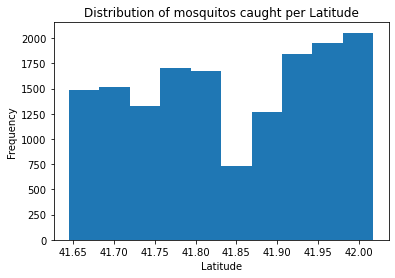

In [16]:
df['Lat'].plot(kind = 'hist')
plt.title('Distribution of mosquitos caught per Latitude')
plt.xlabel('Latitude')

In [17]:
df['Lon'].describe()

count    15571.000000
mean       -87.691642
std          0.076545
min        -87.854473
25%        -87.747459
50%        -87.691698
75%        -87.637873
max        -87.531051
Name: Lon, dtype: float64

Text(0.5, 0, 'Longitude')

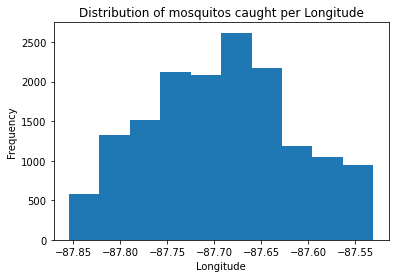

In [18]:
df["Lon"].plot(kind = 'hist')
plt.title('Distribution of mosquitos caught per Longitude')
plt.xlabel('Longitude')

From both the distributions and the describe command it is evident that the latitude and longitudes vary a small amount. Only 0.5 for latitude and 0.3 for longitude. Demonstrating that the location of the traps which were set were concentrated within a specific area. The longitude is distributed normally with a large frequency of traps being set around -87.7. However, the latitude was distributed very differently with the frequency spread quite widely. This would demonstrate that in terms of east to west the distribution of traps varied very little with it concentrated within the area of -87.7. However, the latitude in terms of north to south varied more with more traps being set along the range of 41.6 and 42.

In [19]:
df.groupby('Year')['WNV Present'].value_counts().unstack()

WNV Present,negative,positive
Year,,
2007,1666,475
2008,963,21
2009,1115,20
2010,1299,98
2011,1066,54
2012,1009,383
2013,1140,484
2014,1540,460
2015,986,192


I had to use the unstack column to seperate out the values for negative and positive otherwise they would not be able to be distributed.

<Figure size 1440x1440 with 0 Axes>

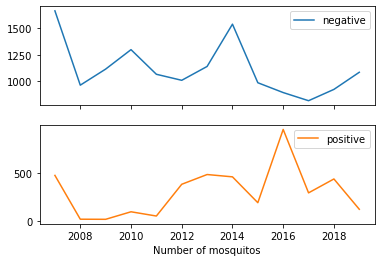

In [13]:
plt.figure(figsize = (20,20))
df.groupby('Year')['WNV Present'].value_counts().unstack().plot(kind="line", subplots = True)
plt.ylabel('')
plt.xlabel('Number of mosquitos')
plt.show()

From the line graphs above, it demonstrates the presence of WNV for each year. From the data in the WNV Present column, it is clear to see that there was a massive spike up in 2016. This was due to higher temperatures and more favourable environmental conditions for mosquitos. From the trend of the two graphs it can be seen that there is a positive trend for the positive presence of WNV and vice versa for negative. With climate change increasing temperatures and producing environments more favourable for mosquitos this explains the rise. Furthermore, CULEX mosquitos enjoy urban conditions and with increased urbanisation of chicago more mosquitos are being attracted to the area. 

In [21]:
df['Species'].value_counts()

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: Species, dtype: int64

Text(0, 0.5, 'Species')

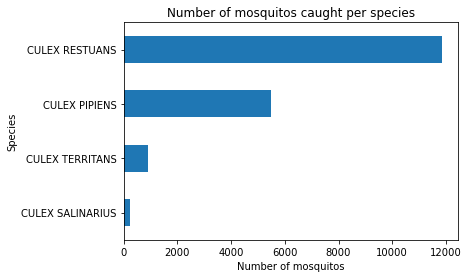

In [22]:
df['Species'].value_counts().sort_values().plot(kind="barh")
plt.title('Number of mosquitos caught per species')
plt.xlabel('Number of mosquitos')
plt.ylabel('Species')


The other categorical column that was studied was the Species of mosquito that were caught in the traps. From the .value_counts() method. There were four types of mosquito species that were captured. It can be seen that they are all part of the Culex family but different sub-species. From my research it was found that Culex mosquitoes are common throughout much of North America. Each Culex species is sensitive to both natural and human-influenced environmental factors, especially climate and land cover type. Some prefer urban environments instead of rural ones, and some are limited to tropical or humid areas. With the bar chart data at hand, the Culex Restuans is the most prevalent species caught in trap types, due to the fact that the urban conditions of Chicago are preferred by this species. From the bar chart it can be assumed that the primary species that spreads WNV is from the Culex family. It is worth noting that this data demonstrates that only one sub-species were caught per trap, which is something to question because the likelihood that a specific trap captures only one species and not the other seems highly inprobable. 

Looking further in the dataframe, there are some redundant columns which could be removed as they are repeating data. Furthermore, the dataframe needs to be checked for any duplicate information be it rows or columns. The columns were studied to determine if information was repeated. 

The transpose of the dataframe was checked for duplicates. This checked if there are any duplicate columns and from the result there were not. Then it was checked if there were any duplicates in the rows and found a sum of 658. I assigned the variable dupli to further determine what data these rows were representing. I thought that there may be specific a reason for the data being duplicated, either through human error or specific column values causing it to be returned true. The data seemed to repeat around the same address of the airport, however, other values seem to be different. I decided to drop the address block and block columns to see if this skewed the results. However, upon further data analysis it seems that this did not. I then decided to drop these rows. 

In [23]:
df.T.duplicated()

Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

In [34]:
df.duplicated().sum()

658

In [35]:
dupli = df[df.duplicated()]

In [36]:
dupli.head(20)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
15495,2018,34,100XX W OHARE AIRPORT,100,T912,GRAVID,2018-08-23 00:08:00,3,Pip,positive,CULEX PIPIENS,NaN,NaN
15504,2011,32,100XX W OHARE AIRPORT,100,T916,GRAVID,2011-08-12 00:08:00,11,Pip,positive,CULEX PIPIENS,NaN,NaN
15520,2010,33,100XX W OHARE,100,T903,GRAVID,2010-08-20 00:08:00,27,Res,positive,CULEX RESTUANS,NaN,NaN
15523,2016,34,100XX W OHARE AIRPORT,100,T911,GRAVID,2016-08-25 00:08:00,8,Res,positive,CULEX RESTUANS,NaN,NaN
15528,2017,34,100XX W OHARE AIRPORT,100,T900,GRAVID,2017-08-24 00:08:00,2,Res,positive,CULEX RESTUANS,NaN,NaN
15530,2017,34,100XX W OHARE AIRPORT,100,T900,GRAVID,2017-08-24 00:08:00,2,Res,positive,CULEX RESTUANS,NaN,NaN
15531,2015,26,100XX W OHARE AIRPORT,100,T902,GRAVID,2015-07-02 00:07:00,50,Res,positive,CULEX RESTUANS,NaN,NaN
15537,2010,31,100XX W OHARE AIRPORT,100,T905,GRAVID,2010-08-06 00:08:00,15,Res,positive,CULEX RESTUANS,NaN,NaN
15542,2018,25,100XX W OHARE AIRPORT,100,T912,GRAVID,2018-06-21 00:06:00,50,Res,positive,CULEX RESTUANS,NaN,NaN
15544,2018,32,100XX W OHARE AIRPORT,100,T913,GRAVID,2018-08-09 00:08:00,46,Res,positive,CULEX RESTUANS,NaN,NaN


In [37]:
dupli.tail(20)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
18382,2018,30,100XX W OHARE AIRPORT,100,T913,GRAVID,2018-07-26 00:07:00,8,Res,positive,CULEX RESTUANS,NaN,NaN
18387,2016,30,100XX W OHARE AIRPORT,100,T913,GRAVID,2016-07-27 00:07:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
18391,2013,35,100XX W OHARE AIRPORT,100,T902,GRAVID,2013-08-29 00:08:00,48,Pip,positive,CULEX PIPIENS,NaN,NaN
18393,2016,36,100XX W OHARE AIRPORT,100,T902,GRAVID,2016-09-08 00:09:00,24,Res,positive,CULEX RESTUANS,NaN,NaN
18394,2016,32,100XX W OHARE AIRPORT,100,T917,GRAVID,2016-08-11 00:08:00,39,Pip,positive,CULEX PIPIENS,NaN,NaN
18396,2018,32,100XX W OHARE AIRPORT,100,T913,GRAVID,2018-08-09 00:08:00,5,Pip,positive,CULEX PIPIENS,NaN,NaN
18399,2009,33,100XX W OHARE,100,T903,GRAVID,2009-08-25 00:08:00,14,Res,positive,CULEX RESTUANS,NaN,NaN
18427,2012,30,100XX W OHARE,100,T903,GRAVID,2012-07-27 00:07:00,4,Res,positive,CULEX RESTUANS,NaN,NaN
18430,2007,32,30XX S HOYNE,30,T035,GRAVID,2007-08-15 00:08:00,1,Res,positive,CULEX RESTUANS,NaN,NaN
18432,2018,29,100XX W OHARE AIRPORT,100,T910,GRAVID,2018-07-19 00:07:00,42,Res,positive,CULEX RESTUANS,NaN,NaN


In [38]:
df = df.drop_duplicates()

In [39]:
df.duplicated().sum() #Sanity check

0

In [40]:
df.corr()

,Year,Week,Block,Mosquito number,Lat,Lon
Year,1.000000,-0.022322,-0.037443,0.119070,0.064088,-0.040140
Week,-0.022322,1.000000,-0.018209,-0.033293,-0.001914,-0.009174
Block,-0.037443,-0.018209,1.000000,0.094457,-0.261829,0.099292
Mosquito number,0.119070,-0.033293,0.094457,1.000000,0.059195,-0.100425
Lat,0.064088,-0.001914,-0.261829,0.059195,1.000000,-0.695048
Lon,-0.040140,-0.009174,0.099292,-0.100425,-0.695048,1.000000


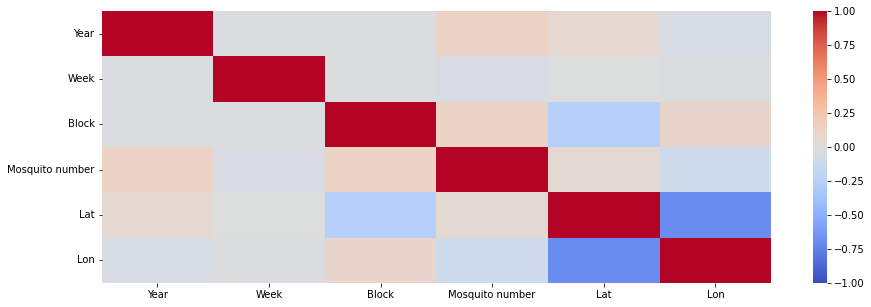

In [14]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), cmap="coolwarm", vmax=1.0, vmin=-1.0)
plt.show()

A further sanity check was conducted checking the correlation between specific columns. This was just another to check if there were any duplicate columns and the output was plotted with a heatmap. If there were any duplicate columns or columns which shared a large amount of information the value would be closer to 1. Which is evident with the Lat and Lon columns as they shared values for location, however, from the heatmap it is evident that there are no duplicate columns.

In [42]:
df['Trap'].value_counts()

T002     406
T114     340
T031     333
T008     326
T138     304
        ... 
T167       1
T135B      1
T241       1
T128A      1
T040       1
Name: Trap, Length: 190, dtype: int64

In [43]:
df['Trap type'].value_counts()

GRAVID      17098
CDC           529
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

In [44]:
df['Block'].value_counts()

100    1677
22      715
58      636
70      629
52      577
       ... 
129       5
29        2
112       2
88        2
54        1
Name: Block, Length: 87, dtype: int64

In [45]:
df['Address Block'].value_counts()

100XX W OHARE AIRPORT       1499
41XX N OAK PARK AVE          408
101XX S STONY ISLAND AVE     369
52XX S KOLMAR AVE            349
1XX N CENTRAL PARK DR        335
                            ... 
29XX N KENNETH AVE             2
54XX W PARKER AVE              1
4XX W 127TH ST                 1
104XX S OGLESBY AVE            1
21XX S HAMLIN AVE              1
Name: Address Block, Length: 154, dtype: int64

In [46]:
df[['Address Block','Block']]

,Address Block,Block
0,100XX W OHARE AIRPORT,100
1,52XX S KOLMAR AVE,52
2,58XX N WESTERN AVE,58
3,39XX N SPRINGFIELD AVE,39
4,131XX S BRANDON AVE,131
...,...,...
18489,63XX W 64TH ST,63
18490,3XX W 18TH ST,3
18491,46XX N MILWAUKEE AVE,46
18492,127XX S DOTY AVE,127


In [47]:
df['Mosquito ID'].value_counts()

Res    11387
Pip     5311
Ter      917
Sal      222
Name: Mosquito ID, dtype: int64

In [48]:
df['Species'].value_counts()

CULEX RESTUANS      11387
CULEX PIPIENS        5311
CULEX TERRITANS       917
CULEX SALINARIUS      222
Name: Species, dtype: int64

In [49]:
df[['Mosquito ID','Species']]

,Mosquito ID,Species
0,Res,CULEX RESTUANS
1,Res,CULEX RESTUANS
2,Res,CULEX RESTUANS
3,Res,CULEX RESTUANS
4,Res,CULEX RESTUANS
...,...,...
18489,Pip,CULEX PIPIENS
18490,Pip,CULEX PIPIENS
18491,Pip,CULEX PIPIENS
18492,Res,CULEX RESTUANS


Looking at the code above it is clear to see that the block column is redundant. It is repeating the same values as in the address block so can be removed which is done with the code below. Also, the Mosquito ID and Species are repeating the same information. The Mosquito ID column is just a shorthand of the species column. Furthermore, I thought the year and week column were also redundant as they are part of the Date column, however, as seen later on the notebook the year was needed to for plotting distributions. So I chose not to remove the year row but did the week column. All the redundant columns were removed with the drop column and axis = 1, to ensure that it was the column that was removed not the row. 

In [50]:
df = df.drop('Block', axis=1)

In [51]:
df = df.drop('Mosquito ID', axis=1)

In [52]:
df = df.drop('Week', axis=1)

In [53]:
#Sanity check to ensure that the columns were removed
df

,Year,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
1,2019,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...
18489,2013,63XX W 64TH ST,T155,GRAVID,2013-08-29 00:08:00,3,positive,CULEX PIPIENS,41.776009,-87.779408
18490,2016,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176


Lastly, the final part of the EDA process was to check for null values. Null values can skew results and can affect the insights made. So the first step is to use the isna() function which goes through the dataframe by row and returns the number of null values in each row. We can then calculate the mean number of null values for each row to determine what method to go forward to deal with the null values, for example, with the impute method or deleting the rows completely. 

In [54]:
df.isna().sum()

Year                  0
Address Block         0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

In [55]:
df.isna().mean()*100

Year                0.00000
Address Block       0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
dtype: float64

Given that there are 15% of the rows in the lat and lon column are null, this is too high a value to just drop these values. It is much more efficient to impute the values into the null column. 

In [56]:
df['Lat'].describe()

count    15571.000000
mean        41.839963
std          0.111374
min         41.644720
25%         41.742670
50%         41.845715
75%         41.945961
max         42.017801
Name: Lat, dtype: float64

In [57]:
all(df['Lon'].isna() == df['Lat'].isna())

True

The above code is to check that where there are missing values for the latitude there are missing values for the longitude. The all function returns True if all the lat and lon values match each other or false if they do not. In this case they all match each other which means that whenever we input the lat values then we can input the lon values as well. 

In [58]:
null_cols = df['Lat'].isna()
address_totals = df[null_cols]['Address Block'].value_counts()
address_totals
for x in address_totals.index:
    print(x)

100XX W OHARE AIRPORT
4XX W 127TH
100XX W OHARE
79XX S CHICAGO
81XX S ASHLAND
115XX S AVENUE L
65XX N OAK PARK AVE
30XX S HOYNE
98XX S AVENUE G
43XX N ASHLAND


Firstly, the above code goes through the Lat column and returns true or false for each row if there is a null value or not. It then groups all the addresses with the null values, with this information I can create a dictionary that can loop through the dictionary with the specific lat and lon value for each address. Then I can loop through the dataframe and when there is a null value, I can match the address with the one in the dictionary and impute the lat/lon values.

In [59]:
address_dictionary = {'100XX W OHARE AIRPORT': [41.978611,-87.904724],
 '4XX W 127TH': [41.663278,-87.633214],
 '100XX W OHARE': [41.978611,-87.904724] ,
 '79XX S CHICAGO': [42.2650026,-87.0639159],
 '81XX S ASHLAND': [41.870436,-87.665853],
 '115XX S AVENUE L': [41.697376, -87.528177],
 '65XX N OAK PARK AVE': [41.935567,-87.795257],
 '30XX S HOYNE': [41.833866,-87.678173],
 '98XX S AVENUE G': [41.709293,-87.5315843],
 '43XX N ASHLAND': [41.882612,-87.667027]}

In [60]:
df['Lat'].isna().value_counts() #To check that how many null values there are in lat column. True if null

False    15571
True      2266
Name: Lat, dtype: int64

In [ ]:
df.loc[df['Address Block'] == '100XX W OHARE AIRPORT'['Lat','Lon']] =[41.978611,-87.904724] #another way 

In [61]:
isna = df[df['Lat'].isna()]

In [62]:
isna

,Year,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
44,2019,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-19 00:09:00,3,negative,CULEX RESTUANS,NaN,NaN
55,2019,100XX W OHARE AIRPORT,T905,GRAVID,2019-09-19 00:09:00,2,negative,CULEX TERRITANS,NaN,NaN
57,2019,100XX W OHARE AIRPORT,T905,GRAVID,2019-09-19 00:09:00,4,negative,CULEX RESTUANS,NaN,NaN
93,2019,100XX W OHARE AIRPORT,T905,GRAVID,2019-09-12 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15430,2007,4XX W 127TH,T135,CDC,2007-06-26 04:06:06,25,negative,CULEX RESTUANS,NaN,NaN
15439,2007,4XX W 127TH,T135,CDC,2007-06-05 00:06:00,4,negative,CULEX RESTUANS,NaN,NaN
15441,2007,43XX N ASHLAND,T145,GRAVID,2007-06-05 00:06:00,3,negative,CULEX RESTUANS,NaN,NaN
15452,2007,65XX N OAK PARK AVE,T143,GRAVID,2007-06-05 00:06:00,9,negative,CULEX RESTUANS,NaN,NaN


I assigned a isna the output dataframe of when a lat column has a null value. I wanted to understand the data, if there was any correlation between the null values and another data in the rows. From this I could not see that there was anything related to the null value. 

In [63]:
for address in address_dictionary.keys():
    df.loc[df["Address Block"] == address, 'Lat'] = address_dictionary[address][0]
           
for address in address_dictionary.keys():
    df.loc[df["Address Block"] == address, 'Lon'] = address_dictionary[address][1]
    
df

,Year,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.978611,-87.904724
1,2019,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...
18489,2013,63XX W 64TH ST,T155,GRAVID,2013-08-29 00:08:00,3,positive,CULEX PIPIENS,41.776009,-87.779408
18490,2016,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176


My method was to loop through the keys address dictionary I created with all the addresses that had null values. If the address in the dataframe matched the address in the address_dictionary it imputed the the lat and lon values. Although this meant that it imputed values which may not have had null values for that specific address, this seemed like the easiest option. I then did a sanity check below to ensure that there were no more null values in the dataframe. 

In [64]:
#SANITY CHECK

df.isna().sum()

Year               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

## Insights and Analysis

To demonstrate the relationship between mosquito number and the date I used certain viusals. 

I initially got rid of the year and month column as I thought they were redundant data, but then I needed those values to plot the data which I extracted with the pandas.Series.dt.year and month code. So I went through the notebook again and took out those commands and used the year and month columns to plot the data in bar charts which help to demonstrate the relationships much more clearly than above. I was able to use the groupby function to group by the month and year, which categorised the data meaning that bar charts were the obvious choice for presenting the data. 

In [65]:
df.groupby(["Year"])["Mosquito number"].sum()

Year
2007    24156
2008     3882
2009     5462
2010     7363
2011     7256
2012    10703
2013    22855
2014    29767
2015    10332
2016    32454
2017     9104
2018    13364
2019     9856
Name: Mosquito number, dtype: int64

<AxesSubplot:xlabel='Year'>

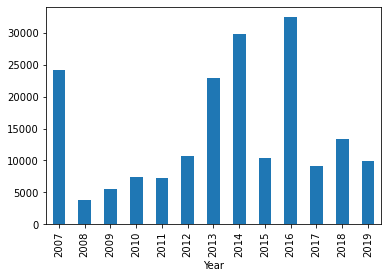

In [66]:
df.groupby(["Year"])["Mosquito number"].sum().plot(kind = 'bar')

In [67]:
corr = df['Year'].corr(df['Mosquito number'])
print(corr)

0.11906957370528921


<AxesSubplot:xlabel='Month'>

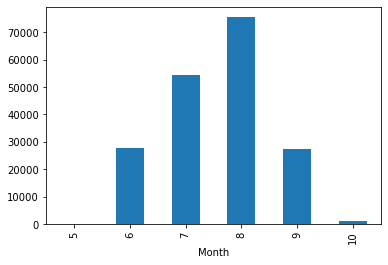

In [68]:
df['Month'] = df['Date'].dt.month
df.groupby(["Month"])["Mosquito number"].sum().plot(kind = "bar")

In [69]:
corr1 = df['Month'].corr(df['Mosquito number'])
print(corr1)

-0.04094150320273147


From the plots it is clear to see that there was a massive drop between 2007 and 2008. Environmental variables such as temperature, relative humidity and precipitation are known to impact mosquito activity, survival and distribution. From my research this was due to lower average temperatures which meant there were less mosquitos about. With 2016 being a hotter year compared to subsequent years, this explained the rise in numberes. However, there is a correlation between higher temperatures and the prevalence of mosquitos as demonstrated in the second bar chart describing months. In August there were a large number of mosquitos caught in the trap which follows trends, below 10 degrees celsius mosquitos are no longer present which supports the data for October where the number which were caught was below 10000. Furthermore, mosquitoes are most active between dusk and dawn. The days are longest during August which helps to describe why there were so many mosquitos caught in this month.

Given that the mosquito species was categorical data, the best method of plotting this data was with the use of a bar chart again. With each category having two bars dependent on whether the mosquito had WNV present in it or not. With the help of a group by I was able to group by species and the use of unstack command to split up the data for each species with positive or negative. 

In [ ]:
df['WNV Present digit '] = df[WNV Prsent].replace({positive:1,negative : 0}) #ANOTHER WAY 

In [70]:
df.groupby(["Species"])["WNV Present"].value_counts()

Species           WNV Present
CULEX PIPIENS     negative       4074
                  positive       1237
CULEX RESTUANS    negative       9309
                  positive       2078
CULEX SALINARIUS  negative        215
                  positive          7
CULEX TERRITANS   negative        903
                  positive         14
Name: WNV Present, dtype: int64

In [71]:
WNV_present = df.groupby(["Species"])["WNV Present"].value_counts().unstack()

<AxesSubplot:xlabel='Species'>

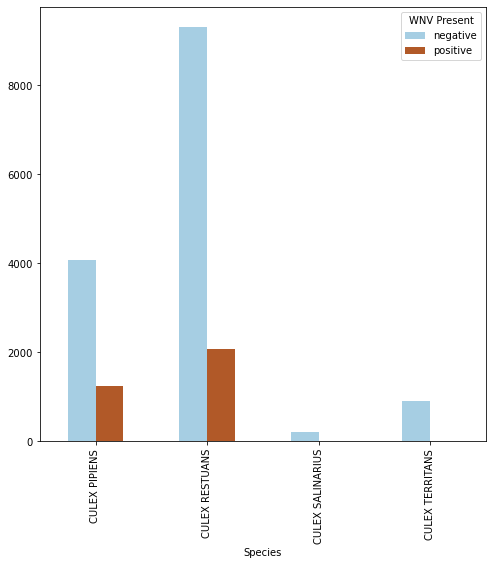

In [72]:
df.groupby(["Species"])["WNV Present"].value_counts().unstack().plot(kind='bar', colormap = 'Paired', figsize = (8,8))

In [73]:
WNV_present['Percentage'] = round((WNV_present['positive']/WNV_present['negative'])*100,2)

In [74]:
WNV_present

WNV Present,negative,positive,Percentage
Species,,,
CULEX PIPIENS,4074,1237,30.36
CULEX RESTUANS,9309,2078,22.32
CULEX SALINARIUS,215,7,3.26
CULEX TERRITANS,903,14,1.55


I used colormap = 'Paired' to switch the colours around and present a different plot to previous ones. From the visualisation it is clear to see that both CULEX PIPENS and CULEX RESTUANS were the two sub-species which had a high prevalence of WNV. 34.66% of PIPENS and 27.47% of RESTUANS were positive with WNV. From external research it is thought that PIPENS and RESTUANS are more resilient to weather conditions and have adapted to bite mammals this may be due to a host of reasons from weather conditions to geographical position.

The following visual explores the relationship between the number of mosquitos caught and trap type.

In [75]:
df['Trap type'].value_counts()

GRAVID      17098
CDC           529
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

In [76]:
df['Mosquito number'].sum()

186554

In [91]:
data = df.groupby('Trap type').sum()['Mosquito number']

In [78]:
df['Trap type'].value_counts()

GRAVID      17098
CDC           529
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

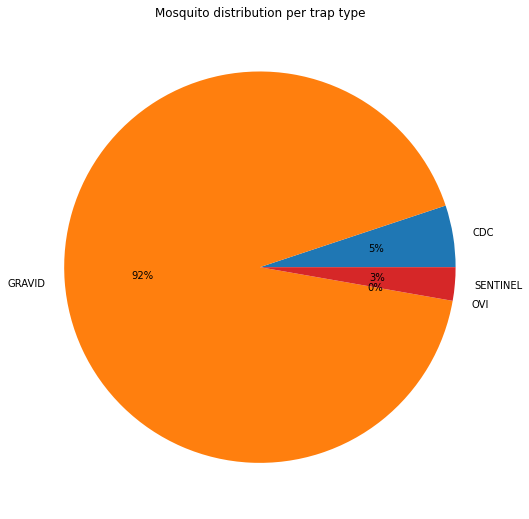

In [89]:
data.plot(kind='pie', figsize = (9,9), autopct = '%.0f%%')
plt.title('Mosquito distribution per trap type')
pylab.ylabel('')
plt.show()

From the data visualisation above, it is clear to see that GRAVID traps are the most robust. With the largest portion of the pie chart followed by CDC, SENTINEL and then OVI. There was a y label on the pie chart which was overlapping the GRAVID label. To overcome this problem, I had to import the pylab library which and then set the ylabel to nothing to remove the axis label. This helped the visualisation to be much clearer. 

From external research, the best way to reduce the number of mosquitos is to eliminate all sources of standing water that can support mosquito breeding, including water in bird baths, ponds, flowerpots, wading pools, old tires and any other receptacles. In communities where there are organized mosquito control programs, contact your municipal government to report areas of stagnant water in roadside ditches, flooded yards and similar locations that may produce mosquitoes. Furthermore, the Gravid Mosquito trap is a plastic washbasin, filled with a liquid attractant fondly called "Mosquito Soup". This takes advantage of the fact that mosquitos are attracted to stagnant water and it is demonstrated by the numbers. The CDC trap uses light to atrract the mosquitos and captures them. Meanwhile, the sentinel trap uses an electric fan to to suck in the mosquitos into a pipe to capture them. Finally, OVI also adopts the use of liquid to attract mosquitos but it only attracts female mosquitos in an attempt to stop breeding. From the data it is clear to see that it doesn't do a very good a method of attracting mosquitos. With the data at hand, Gravid is the best method for attracting mosquitos and capturing them.

USE BOX PLOT INSTEAD OF PIE CHART

In [80]:
df.groupby('Trap').sum()['Mosquito number'].sort_values(ascending = False)

Trap
T002     9285
T008     6618
T138     5787
T115     4822
T114     4634
         ... 
T241        2
T078        2
T128A       2
T167        1
T040        1
Name: Mosquito number, Length: 190, dtype: int64

In [81]:
df.groupby(['Mosquito number','Trap']).sum()

Year          Lat          Lon  Month
Mosquito number Trap                                         
1               220A    2008    41.987054   -87.728398      9
                T001   12042   251.725695  -526.403057     51
                T002   86498  1804.120851 -3775.293250    330
                T002A   4020    83.930828  -175.564238     16
                T003   90515  1888.441869 -3949.128527    349
...                      ...          ...          ...    ...
50              T917    2016    41.978611   -87.904724      8
                T918   10057   209.893055  -439.523620     35
                T923    4030    83.957222  -175.809448     16
                T924    2015    41.978611   -87.904724      6
                T925    4030    83.957222  -175.809448     14

[3261 rows x 4 columns]

In [82]:
df['Trap'].str.len().value_counts()

4    17251
5      586
Name: Trap, dtype: int64

In [83]:
df['Trap'] = df['Trap'].apply(lambda x : x[:4] if len(x) >4 else x)

In [84]:
df['Trap'].str.len().value_counts()

4    17837
Name: Trap, dtype: int64

In [85]:
df['Trap'].str.isalpha().value_counts() #Sanity check to ensure that all the letters have been removed.

False    17837
Name: Trap, dtype: int64

In [86]:
df['Trap'].value_counts()

T002    418
T138    369
T114    349
T054    335
T030    335
       ... 
T229      2
T078      2
T241      1
T167      1
T040      1
Name: Trap, Length: 165, dtype: int64

In [87]:
df.groupby("Trap")["Mosquito number"].sum().sort_values()[-15:]

Trap
T912    3041
T225    3207
T128    3243
T066    3269
T913    3696
T028    4085
T151    4289
T011    4348
T009    4382
T030    4671
T115    4822
T114    4974
T008    6618
T138    8117
T002    9342
Name: Mosquito number, dtype: int64

Text(0.5, 1.0, 'Yearly distribution of mosquitos caught in trap T002')

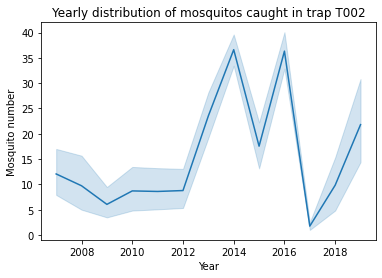

In [88]:
sns.lineplot(data= df[df['Trap'] == 'T002'], x="Year", y="Mosquito number")
plt.title('Yearly distribution of mosquitos caught in trap T002')

Due to the data inputted in the Trap regarding satellite traps, there were certain letters at the end of specific traps. This skewed the results when grouping by Trap. Therefore, I first had to filter through the Trap column to ensure that these were removed. Given that the letter increased the length of the string to 5 this was the method which I reduced them all to 4. I then filtered the data to find the trap with the highest number of mosquitos caught in it and plotted against the year. 

Trap T002 was the most efficient and upon further analysis of the location of the trap it was identified that it was quite inland. It was not as close to the coast as expected. However, due to the attraction mosquitos have to urban environments with it being humid and warm this explains why so many were caught in this area. Furthermore, the fact that this trap type was GRAVID and from the pie chart earlier demonstrating how successful GRAVID mosquito traps are, this contributed to the high number of mosquitos caught. 

The visualisation followed the trends of the total number of mosquitos caught reachiing highs in 2014 and 2016 as expected. Although 2016 experienced higher temperatures than 2014 the trap still caught the same amount of mosquitos, demonstrating that in that certain Address block there wasn't a significant change in mosquito numbers even though it was an urban environment. However, this does compund the fact that mosquitos like warm conditions as the rise in the number caught correlates with the high temperatures of 2014 and 2016. 

# Conclusion

To conlude, mosquitoes are more likely to bite when the weather is warm and sunny. This is because they like to breed in warm, humid areas. Mosquitoes are cold-blooded insects. They prefer to live in areas that are around 70-80 degrees fahrenheit. This is demonstrated by the bar chart visualisation the mosquito numbers for each month. Although it has been recorded that July is the hottest month of the year and the temperature is perfect for mosquitos the conditions are not right for mosquitos as they appreciate humidity as well. This is why there were a larger number of mosquitos caught in August as the humidity levels were perfect for mosquitos. Through external research, the pipens sub species of the Culex family is the biggest carrier of WNV, with 34.66% of the mosquitos caught testing positive. It is clear from the pie chart about the trap type that mosquitos are heavily attracted to water. With Chicago being so close to the water this explains the prevalence of WNV in the area, but reducing water ditches and areas of stagnant water will help to reduce the spread of the disease. Furthermore, increasing awareness about the disease in the summer months will help to stop the spread of the disease. Encouraging the use of insect repellent and usage of mosquito nets are necessary procedures to stop the spread.

Finally, when analysing the data there multiple indentical rows with the only differing value being the Latitude and Longitude data. Initially I thought this contributed to the duplicate rows values, however, upon further analysis it was determined that traps were set in the same block area as the only differing value was the coordinates. 